In [1]:
# Import Libraries
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#  Data collection of cryptocurrencies - "Bitcoin-USD", "Ethereum-USD", "BinanceCoin-USD"
symbols = ["BTC-USD", "ETH-USD", "BNB-USD"]
start_date = "2020-01-01"
end_date = "2024-01-01"

In [3]:
# Download historical data 
data = yf.download(symbols, start=start_date, end=end_date)["Adj Close"].round(2)

[*********************100%%**********************]  3 of 3 completed


In [4]:
data.tail()

,BNB-USD,BTC-USD,ETH-USD
Date,,,
2023-12-27,323.68,43442.86,2378.74
2023-12-28,323.60,42627.86,2347.57
2023-12-29,313.88,42099.40,2300.69
2023-12-30,317.17,42156.90,2292.07
2023-12-31,312.44,42265.19,2281.47


In [5]:
# Portfolio Creation
crypto_portfolio = data.copy()

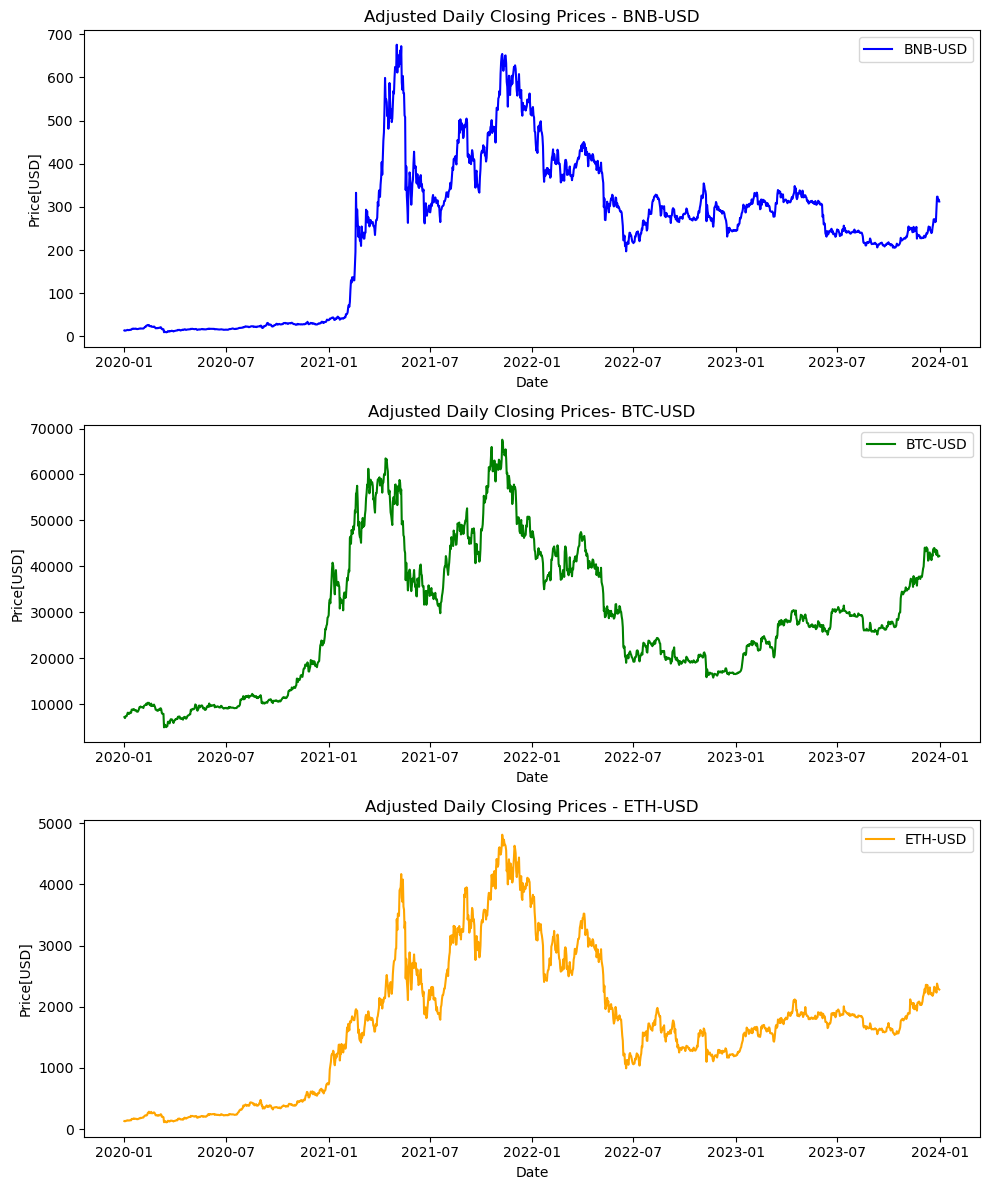

In [6]:
#  Plot Daily adj. closing prices of the Crytocurrencies
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))
ax1.plot(crypto_portfolio["BNB-USD"], label="BNB-USD", color="blue")
ax1.set_title("Adjusted Daily Closing Prices - BNB-USD")
ax1.set_ylabel("Price[USD]")
ax1.set_xlabel("Date")
ax1.legend()

ax2.plot(crypto_portfolio["BTC-USD"], label="BTC-USD", color="green")
ax2.set_title("Adjusted Daily Closing Prices- BTC-USD")
ax2.set_ylabel("Price[USD]")
ax2.set_xlabel("Date")
ax2.legend()

ax3.plot(crypto_portfolio["ETH-USD"], label="ETH-USD", color="orange")
ax3.set_title("Adjusted Daily Closing Prices - ETH-USD")
ax3.set_ylabel("Price[USD]")
ax3.set_xlabel("Date")
ax3.legend()

plt.tight_layout() 
plt.show()


In [7]:
# Calculate  Daily Returns
returns = crypto_portfolio.pct_change().dropna()

In [8]:
returns

,BNB-USD,BTC-USD,ETH-USD
Date,,,
2020-01-02,-0.048210,-0.029819,-0.025917
2020-01-03,0.048350,0.051451,0.053057
2020-01-04,0.016837,0.008956,0.006708
2020-01-05,0.015839,0.000089,0.008958
2020-01-06,0.060241,0.048291,0.058849
...,...,...,...
2023-12-27,0.087306,0.021695,0.065997
2023-12-28,-0.000247,-0.018760,-0.013104
2023-12-29,-0.030037,-0.012397,-0.019970


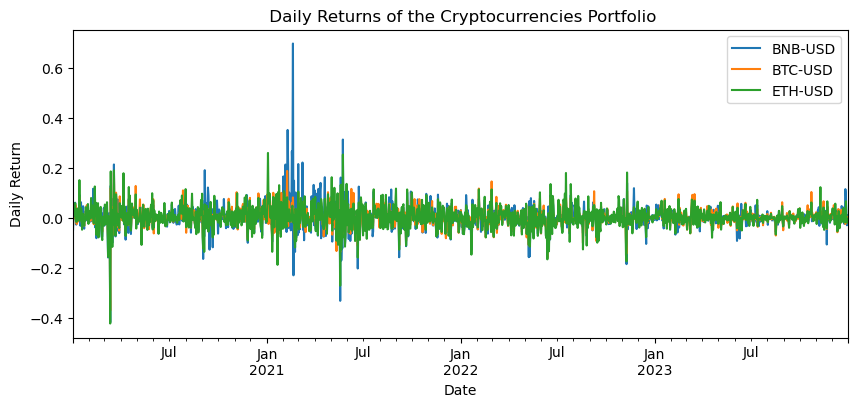

In [9]:
#Plot Daily returns
returns.plot(xlabel = "Date", ylabel = "Daily Return", title=" Daily Returns of the Cryptocurrencies Portfolio", figsize=(10, 4));

In [10]:
# Step 4: Compute statistics for each asset class
daily_avg_return = returns.mean()*100
daily_sd = returns.std()*100
daily_variance = returns.var()*100
annual_avg_return = daily_avg_return*365
annual_sd = daily_sd*np.sqrt(365)
skewness = returns.skew()
kurtosis = returns.kurtosis()

In [11]:
asset_class_stats = pd.DataFrame(
    [daily_avg_return,daily_sd,daily_variance,annual_avg_return,annual_sd,skewness,kurtosis],
    index= ["Average Daily Return (%)","Daily Standard Deviation (%)","Daily Variance (%)", "Annual Average Return (%)","Annual Standard Deviation (%)","Skewness","Kurtosis"]
)

In [12]:
asset_class_stats

,BNB-USD,BTC-USD,ETH-USD
Average Daily Return (%),0.339812,0.183249,0.301593
Daily Standard Deviation (%),5.074982,3.479875,4.541932
Daily Variance (%),0.257554,0.121095,0.206291
Annual Average Return (%),124.031364,66.885837,110.081341
Annual Standard Deviation (%),96.957393,66.482910,86.773496
Skewness,1.741967,-0.642585,-0.426847
Kurtosis,32.647627,11.764593,8.878626


In [13]:
#Create Correlation Matrix
correlations = returns.corr().round(2)
correlations

,BNB-USD,BTC-USD,ETH-USD
BNB-USD,1.00,0.67,0.69
BTC-USD,0.67,1.00,0.82
ETH-USD,0.69,0.82,1.00


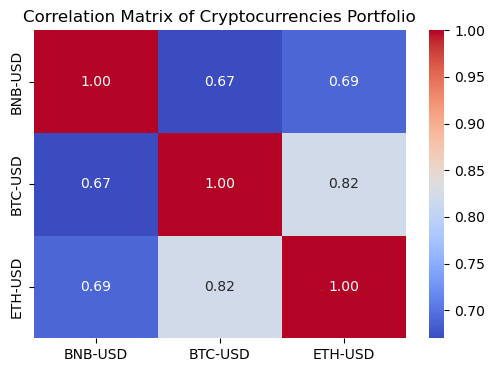

In [14]:
# Plot a heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Cryptocurrencies Portfolio")
plt.show()

In [15]:
#Create Covariance Matrix
covariances = returns.cov().round(4)
covariances

,BNB-USD,BTC-USD,ETH-USD
BNB-USD,0.0026,0.0012,0.0016
BTC-USD,0.0012,0.0012,0.0013
ETH-USD,0.0016,0.0013,0.0021


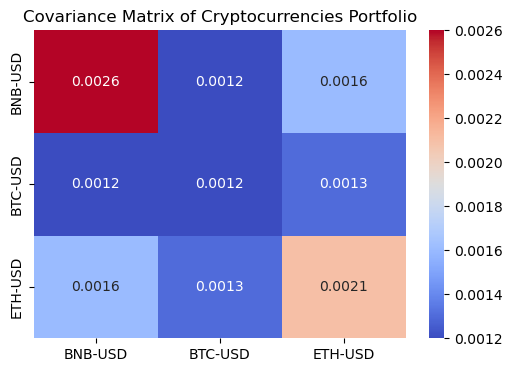

In [16]:
#  Plot a heatmap for the covariance matrix
plt.figure(figsize=(6, 4))
sns.heatmap(covariances, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Covariance Matrix of Cryptocurrencies Portfolio")
plt.show()

In [40]:
# Create a Baseweight Portfolio
weights=np.array([1/3, 1/3, 1/3])
weighted_returns = (returns * weights).sum(axis=1)
weighted_portfolio_stats_daily = {
    "Average Return (%)": weighted_returns.mean()*100,
    "Volatility/ SD (%)": weighted_returns.std()*100,
    "Variance (%)": weighted_returns.var()*100,
    "Skewness": weighted_returns.skew(),
    "Kurtosis": weighted_returns.kurtosis()
}


In [41]:
weighted_portfolio_stats_daily

{'Average Return (%)': 0.2748845128611871,
 'Volatility/ SD (%)': 3.9379895810288175,
 'Variance (%)': 0.15507761940291523,
 'Skewness': -0.6974190565147809,
 'Kurtosis': 12.33687445724855}

In [42]:
portfolio_stats_daily = pd.DataFrame(weighted_portfolio_stats_daily, index = ["Portfolio Statistics(Daily)"])
portfolio_stats_daily

,Average Return (%),Volatility/ SD (%),Variance (%),Skewness,Kurtosis
Portfolio Statistics(Daily),0.274885,3.93799,0.155078,-0.697419,12.336874


In [20]:
#Annualised Covariance Matrix
cov_matrix_annual = covariances*365
cov_matrix_annual

,BNB-USD,BTC-USD,ETH-USD
BNB-USD,0.949,0.4380,0.5840
BTC-USD,0.438,0.4380,0.4745
ETH-USD,0.584,0.4745,0.7665


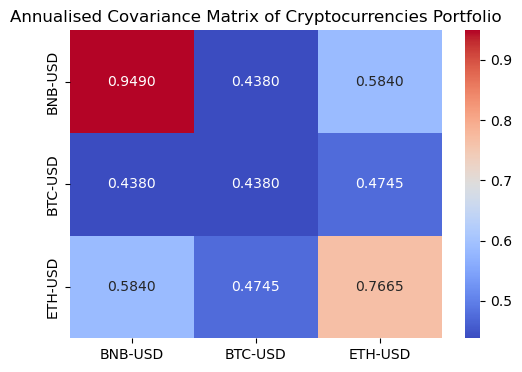

In [21]:
#  Plot a heatmap for the Annualised covariance matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cov_matrix_annual, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Annualised Covariance Matrix of Cryptocurrencies Portfolio")
plt.show()

In [22]:
# Calculate Annualised Portfolio Variance, Annualised portfolio volatility, Annualised Portfolio Average Return 
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
port_sd = np.sqrt(port_variance)
annual_simple_port_ret= np.sum(returns.mean()*weights*365)
weighted_portfolio_stats_annual = {
    "Average Return (%)": annual_simple_port_ret*100,
    "Volatility/ Risk/ SD (%)": port_sd*100,
    "Variance (%)": port_variance*100
}

In [23]:
weighted_portfolio_stats_annual

{'Average Return (%)': 100.33284719433352,
 'Volatility/ Risk/ SD (%)': 75.61966234606798,
 'Variance (%)': 57.18333333333332}

In [24]:
portfolio_stats_annual = pd.DataFrame(weighted_portfolio_stats_annual, index = ["Portfolio Statistics(Annual)"])
portfolio_stats_annual

,Average Return (%),Volatility/ Risk/ SD (%),Variance (%)
Portfolio Statistics(Annual),100.332847,75.619662,57.183333


In [43]:
portfolio_stats_daily

,Average Return (%),Volatility/ SD (%),Variance (%),Skewness,Kurtosis
Portfolio Statistics(Daily),0.274885,3.93799,0.155078,-0.697419,12.336874


In [27]:
asset_class_stats

,BNB-USD,BTC-USD,ETH-USD
Average Daily Return (%),0.339812,0.183249,0.301593
Daily Standard Deviation (%),5.074982,3.479875,4.541932
Daily Variance (%),0.257554,0.121095,0.206291
Annual Average Return (%),124.031364,66.885837,110.081341
Annual Standard Deviation (%),96.957393,66.482910,86.773496
Skewness,1.741967,-0.642585,-0.426847
Kurtosis,32.647627,11.764593,8.878626
